### Making Geojson_File from Korean Energy District Classification

건축물의 에너지절약설계기준의 지역분류는 중부1, 중부2, 남부, 제주도 총 4개로 구분되며, 지역별로 건축물 부위의 열관류율의 값이 다르게 적용된다. 각 지역은 대체로 북-남 방향 시도별로 구분되어 있으나, 일부는 시,군,구에 따라 서로 다른 지역에 속하기도 한다.
<span style='color:red'>(예, 강원도는 중부1지역(철원군, 화천군, 양구군, 춘천시, 인제군, 홍천군, 횡성군, 평창군, 원주시, 영월군, 정선군, 태백시), 중부2지역(고성군, 속초시, 양양군, 강릉시, 동해시, 삼척시)으로 나뉨)</span><br>

에너지절약설계기준의 지역분류에 포함되는 시도군은 총 161개이며, 공용데이터로 지원되는 시도별 지리데이터(shp or geojson)는 약 20개, 시군구별 지리데이터(shp or geojson)는 약 250개로 양 측 모두와 불일치하다. 공용 지리데이터를 이용, 위의 예처럼 정리가 필요한 지역들 및 Geometry 정보를 편집하여 최종적으론 에너지절약설계기준용 Geojson 파일을 생성한다.

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from shapely.geometry import *
from shapely import wkt
import geopandas as gpd
from geopandas import GeoSeries

### 건축물의에너지절약설계기준(제2017-881호) 지역분류
중부1지역<br> 
- 강원도 (철원군, 화천군, 양구군, 춘천시, 인제군, 홍천군, 횡성군, 평창군, 원주시, 영월군, 정선군, 태백시)
- 경기도 (가평군, 남양주시, 동두천시, 양주시, 연천군, 의정부시, 파주시, 포천시)
- 충청북도 (제천시)
- 경상북도 (봉화군, 청송군)

중부2지역<br>
- 서울특별시 (종로구, 중구, 용산구, 성동구, 광진구, 동대문구, 중랑구, 성북구, 강북구, 도봉구, 노원구, 은평구, 서대문구, 마포구, 양천구, 강서구, 구로구, 금천구, 영등포구, 동작구, 관악구, 서초구, 강남구, 송파구, 강동구)
- 대전광역시 (동구, 중구, 서구, 유성구, 대덕구)
- 세종특별시
- 인천광역시 (중구, 동구, 미추홀구, 연수구, 남동구, 부평구, 계양구, 서구, 강화군, 옹진군)
- 강원도 (고성군, 속초시, 양양군, 강릉시, 동해시, 삼척시)
- 경기도 (고양시, 과천시, 광명시, 광주시, 구리시, 군포시, 김포시, 부천시, 성남시, 수원시, 시흥시, 안산시, 안성시, 안양시, 양평군, 여주시, 오산시, 용인시, 의왕시, 이천시, 평택시, 하남시, 화성시)
- 충청북도 (청주시, 충주시, 괴산군, 단양군, 보은군, 영동군, 옥천군, 음성군, 증평군, 진천군)
- 충청남도  (천안시, 공주시, 보령시, 아산시, 서산시, 논산시, 계룡시, 당진시, 금산군, 부여군, 서천군, 청양군, 홍성군, 예산군, 태안군)
- 경상북도 (김천시, 안동시, 구미시, 영주시, 영천시, 상주시, 문경시, 군위군, 의성군, 영양군, 고령군, 성주군, 칠곡군, 예천군, 울릉군)
- 전라북도 (전주시, 익산시, 군산시, 정읍시, 김제시, 남원시, 완주군, 고창군, 부안군, 임실군, 순창군, 진안군, 무주군, 장수군)
- 경상남도 (거창군, 함양군)

남부지역<br>
- 부산광역시 (중구, 서구, 동구, 영도구, 부산진구, 동래구, 남구, 북구, 해운대구, 사하구, 금정구, 강서구, 연제구, 수영구, 사상구, 기장군)
- 대구광역시 (중구, 동구, 서구, 남구, 북구, 수성구, 달서구, 달성군)
- 울산광역시 (중구, 남구, 동구, 북구, 울주군)
- 광주광역시 (동구, 서구, 남구, 북구, 광산구)
- 전라남도 (목포시, 여수시, 순천시, 나주시, 광양시, 담양군, 곡성군, 구례군, 고흥군, 보성군, 화순군, 장흥군, 강진군, 해남군, 영암군, 무안군, 함평군, 영광군, 장성군, 완도군, 진도군, 신안군)
- 경상북도 (울진군, 영덕군, 포항시, 경주시, 청도군, 경산시)
- 경상남도 (창원시, 김해시, 진주시, 양산시, 거제시, 통영시, 사천시, 밀양시, 함안군, 창녕군, 고성군, 하동군, 합천군, 남해군, 산청군, 의령군)

제주도

### 폴리곤 병합(merge)이 필요한 시군구

- 수원시 (장안구, 권선구, 팔달구, 영통구) (41111, 41113, 41115, 41117)

- 성남시 (수정구, 중원구, 분당구) (41131, 41133, 41135)

- 안양시 (만안구, 동안구) (41171, 41173)

- 안산시 (상록구, 단원구) (41271, 41273)

- 고양시 (덕양구, 일산동구, 일산서구) (41281, 41285, 41287)

- 용인시 (처인구, 기흥구, 수지구) (41461, 41463, 41465)

- 창원시 (의창구, 성산구, 마산합포구, 마산회원구, 진해구) (48121, 48123, 48125, 48127, 48129)

- 포항시 (남구, 북구) (47111, 47113)

- 광주광역시 (동구, 서구, 남구, 북구, 광산구) 29110, 29140, 29155, 29170, 29200

- 대구광역시 (중구, 동구, 서구, 남구, 북구, 수성구, 달서구, 달성군) (27110, 27140, 27170, 27200, 27230, 27260, 27290, 27710)

- 대전광역시 (동구, 중구, 서구, 유성구, 대덕구) (30110, 30140, 30170, 30200, 30230)

- 부산광역시 (중구, 서구, 동구, 영도구, 부산진구, 동래구, 남구, 북구, 해운대구, 사하구, 금정구, 강서구, 연제구, 수영구, 사상구, 기장군) (26110, 26140, 26170, 26200, 26230, 26260, 26290, 26320, 26350, 26380, 26410, 26440, 26470, 26500, 26530, 26710)

- 서울특별시 (종로구, 중구, 용산구, 성동구, 광진구, 동대문구, 중랑구, 성북구, 강북구, 도봉구, 노원구, 은평구, 서대문구, 마포구, 양천구, 강서구, 구로구, 금천구, 영등포구, 동작구, 관악구, 서초구, 강남구, 송파구, 강동구) (11110, 11140, 11170, 11200, 11215, 11230, 11260, 11290, 11305, 11320, 11350, 11380, 11410, 11440, 11470, 11500, 11530, 11545, 11560, 11590, 11620, 11650, 11680, 11710, 11740)

- 울산광역시 (중구, 남구, 동구, 북구, 울주군) (31110, 31140, 31170, 31200, 31710)

- 인천광역시 (중구, 동구, 미추홀구, 연수구, 남동구, 부평구, 계양구, 서구, 강화군, 옹진군) (28110, 28140, 28177, 28185, 28200, 28237, 28245, 28260, 28710, 28720)

- 전주시 (완산구, 덕진구) (45111, 45113)

- 제주특별자치도 (제주시, 서귀포시) (50110, 50130)

- 천안시 (동남구, 서북구) (44131, 44133)

- 청주시 (상당구, 서원구, 흥덕구, 청원구) (43111, 43112, 43113, 43114)

In [2]:
korean_districts = gpd.read_file('C:/Users/ilove/Desktop/DATA/district in Korea/TL_SCCO_SIG.json')
korean_districts.head(5)

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,42110,Chuncheon-si,춘천시,"POLYGON ((127.60473 38.07265, 127.60776 38.071..."
1,42130,Wonju-si,원주시,"POLYGON ((128.10856 37.29880, 128.10879 37.297..."
2,42150,Gangneung-si,강릉시,"POLYGON ((129.04785 37.64961, 129.07405 37.604..."
3,42170,Donghae-si,동해시,"POLYGON ((129.15959 37.47574, 129.15821 37.476..."
4,42190,Taebaek-si,태백시,"POLYGON ((129.01210 37.31012, 129.01256 37.308..."


In [3]:
def polygon_merge(dists):
    global korean_districts
    merge_polygon = None
    dist_nums = '|'.join(map(str, dists))
    polygons = korean_districts.loc[korean_districts['SIG_CD'].str.contains(dist_nums, na=False)]['geometry']
    delete_index = korean_districts.loc[korean_districts['SIG_CD'].str.contains(dist_nums, na=False)].index
    
    # 오류 발생 확인을 위해 idx 추가
    for idx, p in enumerate(polygons):
        polygon = Polygon(p)
        # polygon merge 과정에서 오류발생
        # TopologyException: Input geom 1 is invalid: Hole lies outside shell at 128.46837904224051 35.899470834165882
        # polygon.buffer(0)으로 하면 오류발생 안남 이유는 모름
        polygon = polygon.buffer(0)
        if merge_polygon == None:
            merge_polygon = polygon
        else:
            try:
                merge_polygon = merge_polygon.union(polygon)
            except:
                print('error', idx)

    return merge_polygon, delete_index

In [4]:
# 대표번호 첫번째 수의 한자리수 높은 자리에서 내림
# 나누어진 구역의 대표번호가 모두 11110 or 45111 처럼 1로 시작하기 때문에 round로 해도 동일

def new_district_number(num):
    for i in range(5):
        if num % (10**i) != 0:
            new_num = round(num, -i)
            return new_num

In [5]:
edit_districts_list = [['수원시', 'Suwon-si', [41111, 41113, 41115, 41117]],
                 ['성남시', 'Seongnam-si', [41131, 41133, 41135]],
                 ['안양시', 'Anyang-si', [41171, 41173]],
                 ['안산시', 'Ansan-si', [41271, 41273]],
                 ['고양시', 'Goyang-si', [41281, 41285, 41287]],
                 ['용인시', 'Yongin-si', [41461, 41463, 41465]],
                 ['창원시', 'Changwon-si',  [48121, 48123, 48125, 48127, 48129]],
                 ['포항시', 'Pohang-si', [47111, 47113]],
                 ['광주광역시', 'Gwangju-si', [29110, 29140, 29155, 29170, 29200]],
                 ['대구광역시', 'Daegu-si', [27110, 27140, 27170, 27200, 27230, 27260, 27290, 27710]],
                 ['대전광역시', 'Daejeon-si', [30110, 30140, 30170, 30200, 30230]],
                 ['부산광역시', 'Busan-si', [26110, 26140, 26170, 26200, 26230, 26260, 26290, 26320, 26350, 26380, 26410, 26440, 26470, 26500, 26530, 26710]],
                 ['서울특별시', 'Seoul-si', [11110, 11140, 11170, 11200, 11215, 11230, 11260, 11290, 11305, 11320, 11350, 11380, 11410, 11440, 11470, 11500, 11530, 11545, 11560, 11590, 11620, 11650, 11680, 11710, 11740]],
                 ['울산광역시', 'Ulsan-si', [31110, 31140, 31170, 31200, 31710]],
                 ['인천광역시', 'Incheon-si', [28110, 28140, 28177, 28185, 28200, 28237, 28245, 28260, 28710, 28720]],
                 ['전주시', 'Jeonju-si', [45111, 45113]],
                 ['제주특별자치도', 'Jeju-si', [50110, 50130]],
                 ['천안시', 'Cheonan-si', [44131, 44133]],
                 ['청주시', 'Cheongju-si', [43111, 43112, 43113, 43114]]]

n = len(korean_districts)
count = 0

for dist in edit_districts_list:
    name_kor = dist[0]
    name_eng = dist[1]
    merge_nums = dist[2]
    new_num = new_district_number(merge_nums[0])
    edit_polygon, delete_index = polygon_merge(merge_nums)
    # edit & merge district row 추가
    korean_districts = korean_districts.append(pd.DataFrame([[str(new_num), name_eng, name_kor, edit_polygon]], columns=['SIG_CD', 'SIG_ENG_NM', 'SIG_KOR_NM', 'geometry']))
    # dist_nums에 속한 row 삭제
    korean_districts.drop(delete_index, inplace=True)
    count += 1

# reset index
korean_districts = korean_districts.reset_index(drop=True)

### Checking Result of Merge

누락 지역 : 대구 달서군, 부산 강서구, 인천 강화군, 안산시

일부 폴리곤내 영역이 나누어진 지역(예, Polygon (좌표), (좌표)) geom_type은 Polygon이지만 내부에서 폴리곤들이 분리되어 있는 항목들 확인됨, 그리고 해당 항목들에서 병합수행시 일부 구간에서 누락됨<br>
또한, mapshaper.org에서 shp 파일등을 geojson 파일로 컨버팅하고 simplify 과정에서 선의 단순화로 일부 구간의 공백발생<br>
simplify를 조정(보다 복잡하게)하여 진행할 경우, 다수의 지역의 geom_type이 MultiPolygon으로 변환되는데 그 이유를 모르겠음

In [6]:
# 부산 강서구 누락 수정

busan = korean_districts.loc[korean_districts['SIG_CD'] == '26100']
kangseogu = wkt.loads('POLYGON ((128.9973048459866 35.22464418306168, 128.9970899849073 35.22353206822895, 128.9911941775027 35.20442068023949, 128.9877300254159 35.20145511866447, 128.9770696029243 35.19332833266679, 128.9754604641508 35.19266411778098, 128.9648296975699 35.18602980095815, 128.9636180266806 35.18450990376363, 128.9632910506188 35.18364154746703, 128.962219042033 35.16119451088441, 128.9606596659281 35.15432330703933, 128.9604371510883 35.15084180714722, 128.9604042269063 35.15058116880843, 128.960054811157 35.14006960287914, 128.959640574434 35.13664648078658, 128.9596393102 35.13664146120078, 128.9594113011431 35.13662922162182, 128.9352202056099 35.11018258380043, 128.9301070059982 35.10514053419802, 128.895378367089 35.07903726959671, 128.8376072739296 35.08339068569149, 128.8217153475088 35.09774299300431, 128.8370305072757 35.10333412709255, 128.8374829513471 35.10352002376145, 128.8290864244583 35.12832206016792, 128.8280851869485 35.12827971068544, 128.8265718039466 35.12952660303733, 128.8258064261979 35.12999224668981, 128.8073159307006 35.13947956152156, 128.8076694331804 35.14044294697322, 128.807151709658 35.14214929547722, 128.8066853688821 35.14250378032979, 128.8051568981764 35.14211493920995, 128.8045656196743 35.14193547559952, 128.8035597425355 35.14186061122918, 128.7936655022466 35.15716242869193, 128.8253416432042 35.1559654117045, 128.8257722310348 35.15571475588612, 128.8270573468191 35.15560175261344, 128.8275265037942 35.15558862722684, 128.8339540796184 35.15759332515164, 128.8349959800773 35.15823965287132, 128.8429330911119 35.15798870499948, 128.8435447311445 35.15846971802387, 128.8436033956949 35.15866821854317, 128.8436459851266 35.15880795717648, 128.8441831167619 35.15990783830183, 128.8441698725588 35.15997450327137, 128.8440739045199 35.16046302962047, 128.8445414639476 35.16285563020531, 128.8449291015606 35.163103751383, 128.8459997090588 35.1635417104711, 128.8531496421986 35.16636530049093, 128.8541361768501 35.16620799155735, 128.856379821424 35.1669037490641, 128.8576337498311 35.16693734112474, 128.8618947591963 35.16772471638492, 128.863343644323 35.16783556333509, 128.867583356211 35.15895533976767, 128.8675045366242 35.15909229404599, 128.8655440276345 35.15947477329713, 128.8656070556902 35.15943142576011, 128.8656044981843 35.15920045987004, 128.8655478082097 35.15913721104234, 128.8659734578807 35.1572328012554, 128.8660973166353 35.15708544200077, 128.8672188464915 35.15586268589249, 128.8673825048197 35.15559656178385, 128.8673864567501 35.15558931926304, 128.8674760210298 35.15545740588411, 128.8679702778192 35.15486219176877, 128.8685097862035 35.1542072653803, 128.8739852125211 35.15103264425661, 128.8740171656991 35.151035525734, 128.8740188775295 35.15103564471029, 128.874111343647 35.15092592974987, 128.874362787309 35.15063127012521, 128.8752770823503 35.1511462956522, 128.8756769616073 35.15073077166956, 128.8765884195095 35.15124161049369, 128.875292718938 35.15288985792525, 128.8750350408392 35.15319687044273, 128.8792102186047 35.15947969460008, 128.8792977661159 35.15940948625484, 128.879311197822 35.15936703698713, 128.879846466607 35.15946983399421, 128.8814329251682 35.16127689145357, 128.8813936956747 35.16133044711008, 128.8816730845016 35.16174318325657, 128.8807742763705 35.16204228011525, 128.8775341700745 35.16848941121081, 128.8770943358145 35.16876629854445, 128.8740167038434 35.17391677322698, 128.8759451992977 35.17312007946061, 128.8804342608239 35.17152975743161, 128.8805909935833 35.17149972793587, 128.8801415572369 35.17554810795689, 128.8801159673222 35.17758068485961, 128.8800443780015 35.17886668865872, 128.8801467817665 35.17973938958004, 128.8802711780151 35.18030083893971, 128.8806754939309 35.18090723988468, 128.8814171494901 35.18281581289992, 128.8807560362646 35.18357082142852, 128.8794132116051 35.18487331592355, 128.8791920684931 35.18514682384479, 128.8784546709598 35.18592763862774, 128.8782127608583 35.18622287345028, 128.8759158329272 35.19113810014902, 128.8760886503323 35.19180652168439, 128.8759593871645 35.19316819160954, 128.875591257753 35.19363025590732, 128.8737293947778 35.20415196454872, 128.8739415526795 35.20426161171375, 128.8827369720663 35.21155099542734, 128.8828635513814 35.21163829769814, 128.8849055085696 35.21380275460146, 128.8853132455225 35.2140287443124, 128.895466813498 35.21337829818424, 128.8966122542355 35.21314239437329, 128.9010985534415 35.21433372885344, 128.9030792686569 35.21487895564113, 128.9046679925106 35.21530132744913, 128.9069158178895 35.21510192204623, 128.9075028302966 35.215111122648, 128.9085724748748 35.21527366666682, 128.9089230399164 35.21532615905225, 128.9091630630745 35.21597797953697, 128.9089520189319 35.21618308208575, 128.9081049742616 35.21701397011784, 128.9077574112549 35.2173547067904, 128.9051108823082 35.22013002801491, 128.9059694205733 35.22069890728505, 128.9060105664342 35.22072670116565, 128.9064327418615 35.22100857814301, 128.9075987421145 35.22179494629919, 128.9096106554875 35.22303392795703, 128.9102376741355 35.22291629017576, 128.9102851214942 35.22289076323912, 128.9107860571069 35.22279767034716, 128.9108649835181 35.22278290249412, 128.9117196426568 35.22262692045813, 128.9142173933236 35.22014190651694, 128.9166529890983 35.21696081298033, 128.9457098069331 35.2272537262351, 128.9458528012373 35.2271434044051, 128.9482703532233 35.22533402180147, 128.9485347461366 35.22524204706867, 128.949918458722 35.22523977759157, 128.9506783292838 35.22524091882361, 128.9527547424873 35.22525814025075, 128.9577864469182 35.22541966029614, 128.9596157700999 35.2256944953223, 128.9606807276693 35.22585186387759, 128.9746943588537 35.22761574644951, 128.9749787552835 35.22768122856393, 128.9780852878363 35.22839609343686, 128.9784210630793 35.22847199690519, 128.986087269229 35.23052718711877, 128.9862745064245 35.23060240141214, 128.9967601001117 35.23608051244329, 128.9973048459866 35.22464418306168))')
busan_edit_polygon = busan.union(kangseogu)
korean_districts.loc[korean_districts['SIG_CD'] == '26100', 'geometry'] = busan_edit_polygon

# 대구 달서군 누락 수정

daegu = korean_districts.loc[korean_districts['SIG_CD'] == '27100']
dalsugun = wkt.loads('POLYGON((128.4683790422405 35.89947083416588, 128.4690983779744 35.89901352273121, 128.4784767982152 35.89682429582408, 128.4791650183944 35.89661456382811, 128.504788286117 35.89137522049469, 128.5049293804274 35.89136948619967, 128.5256992451401 35.88799448446839, 128.5190300767411 35.86953728907918, 128.5187949203539 35.86932511241663, 128.518459668696 35.86878105757415, 128.5121339402516 35.8682068947116, 128.5115248482964 35.86839787213857, 128.5111928163664 35.86858735477895, 128.5109120259484 35.8688127888113, 128.5099075606522 35.86922810130885, 128.5094163183193 35.86959529140682, 128.5086847783223 35.86710377752946, 128.5086713928417 35.86707324276215, 128.5083915834989 35.86676643091245, 128.5082211037854 35.86635037761391, 128.5082007085653 35.86629684145739, 128.5081830137526 35.86627566181598, 128.5065471190038 35.86604863566041, 128.5064497741731 35.86604141226118, 128.5063605327457 35.866005923304, 128.5062277041004 35.86595210369322, 128.5045133629387 35.86569533713642, 128.5035710029484 35.86571303835309, 128.5034820236587 35.86569077852059, 128.5032653038793 35.8655186088267, 128.502866857711 35.86532223452902, 128.5027885828509 35.86528097544809, 128.5024542754722 35.86505508006031, 128.5017662853876 35.86403438953581, 128.5014549448369 35.86370513374719, 128.5011749383015 35.86353290416223, 128.5010290709888 35.86344799489098, 128.5005341065532 35.86347162661166, 128.4998303996389 35.86370907789068, 128.4985489118479 35.86405651037096, 128.4977688515459 35.8641718275925, 128.4972638957888 35.86417784782117, 128.4917347160565 35.86570953091688, 128.491414310192 35.86578108125875, 128.4910304406809 35.86586272536982, 128.4908925583137 35.86587175571305, 128.4907756763034 35.86591235538096, 128.4906420929612 35.86598300327739, 128.4902011106808 35.86623036472835, 128.4876679061862 35.86763768187816, 128.4871724447099 35.86791529693332, 128.4866489676982 35.86809861063286, 128.4860701983814 35.86810153664374, 128.4849676976276 35.86799857628949, 128.4846631605287 35.86802993653794, 128.4838262112975 35.86778710020261, 128.483769678727 35.86777990808601, 128.4829806723552 35.86767727956315, 128.4816640702127 35.86824518257852, 128.4816822420235 35.86803121751667, 128.4817242819531 35.86781780631726, 128.4811696634333 35.86737012279693, 128.4805607721181 35.86703630699005, 128.4799379667756 35.86641879949838, 128.4764669171471 35.8605048517955, 128.4762964878748 35.86019406329414, 128.4754876338466 35.85922061343775, 128.4740401579477 35.8581138843847, 128.4739642261672 35.85810663857028, 128.4734008562263 35.858000350452, 128.4731151764025 35.8561508451226, 128.4724014934691 35.85371492080537, 128.4716565199909 35.84982526357125, 128.4712195209906 35.84743860366326, 128.4689920535007 35.83963096777291, 128.3865417576958 35.85130538822979, 128.3989766866902 35.89992652584503, 128.4541552739237 35.94314943866124, 128.4764188660141 35.93443933745593, 128.4683790422405 35.89947083416588))')
daegu_edit_polygon = daegu.union(dalsugun)
korean_districts.loc[korean_districts['SIG_CD'] == '27100', 'geometry'] = daegu_edit_polygon

# 안산 누락부분 수정
ansan = korean_districts.loc[korean_districts['SIG_CD'] == '41270']
ansan_omission = wkt.loads('POLYGON ((126.829298252301 37.36317482313436, 126.8295244790377 37.36296791797485, 126.8414678460737 37.36278645570483, 126.834509852309 37.30362465658693, 126.8244022469778 37.30416860058266, 126.8168024063352 37.29804341965559, 126.7893646211123 37.29340677267749, 126.7246846409233 37.31536633530663, 126.7485639111491 37.32968297806942, 126.7606117392704 37.34113308508078, 126.7606381910905 37.34113313893575, 126.7671390857075 37.34271613413495, 126.7672762241343 37.34272325347646, 126.7903085333907 37.35000603221026, 126.7902882063461 37.35027207616381, 126.8115043871005 37.35561506092767, 126.8118982575286 37.35608422304917, 126.8120931061889 37.35644916877121, 126.8130472299681 37.35701410010054, 126.8173215370879 37.35848950292772, 126.8175806229748 37.35870615065416, 126.8202371128109 37.3617737157715, 126.8204627550473 37.36182811345061, 126.8240658510097 37.36568994134219, 126.8242798376575 37.36590650651723, 126.829298252301 37.36317482313436))')
ansan_edit_polygon = ansan.union(ansan_omission)
korean_districts.loc[korean_districts['SIG_CD'] == '41270', 'geometry'] = ansan_edit_polygon

In [7]:
# 인천 누락 수정 (섬 구역으로 merge error로 Multipolygon list 추가 방법으로 수행)
# Error 발생
# ValueError: Must have equal len keys and value when setting with an iterable
# 섬들로 이루어져있어 한 덩어리가 아닌 MultiPolygon으로 작성되는데, 이 경우 숫자가 1개가 아닌 내부에 포함된 폴리곤의 개수만큼으로 산출됨
# gpd.GeoSeries(incheon_edit_polygon).values 로 해결

incheon_polygons = korean_districts.loc[korean_districts['SIG_CD'] == '28100']['geometry']

polygons = []
for i in incheon_polygons:
    for j in i:
        polygons.append(j)
        
incheon_omission_1 = wkt.loads('POLYGON ((126.264516695344 37.8177859737137, 126.2977329085618 37.80219917730991, 126.3157703786009 37.77398875321612, 126.29081542865 37.76294271832154, 126.2163462949183 37.77815929451813, 126.2232200753593 37.80503683597274, 126.264516695344 37.8177859737137))')
incheon_omission_2 = wkt.loads('POLYGON ((126.4312165907913 37.8298695751518, 126.5068972291791 37.78234812041452, 126.5264833865245 37.74732662885508, 126.5137214511587 37.72503488488039, 126.5225125218826 37.65188793485908, 126.5427448413968 37.61780959555252, 126.5106283935224 37.59662425451864, 126.4031678699724 37.59428304311225, 126.3767630962724 37.63629361017008, 126.4126314616412 37.65640571273303, 126.392366592362 37.69419447943856, 126.3555904415652 37.70667750178803, 126.3505795955799 37.78956556000363, 126.4312165907913 37.8298695751518))')
incheon_omission_3 = wkt.loads('POLYGON ((126.5156343284461 37.53422681554858, 126.5640050083955 37.51475494968334, 126.5825749134498 37.49064668407699, 126.5076612203656 37.46618111953222, 126.4430874578446 37.42152576820278, 126.3800536217994 37.43990800177242, 126.35578472578 37.46756812347854, 126.4169123779343 37.49607068061442, 126.4713484659584 37.49847664623879, 126.5156343284461 37.53422681554858))')
polygons.append(incheon_omission_1)
polygons.append(incheon_omission_2)
polygons.append(incheon_omission_3)

incheon_edit_polygon = MultiPolygon(polygons)
incheon_edit_polygon

# incheon_edit_polygon = Polygon(polygons)
# a = Polygon(incheon_edit_polygon)

korean_districts.loc[korean_districts['SIG_CD'] == '28100', 'geometry'] = gpd.GeoSeries(incheon_edit_polygon).values

### 지역구분에 따른 column 추가

중부1지역 : [철원군, 화천군, 양구군, 춘천시, 인제군, 홍천군, 횡성군, 평창군, 원주시, 영월군, 정선군, 태백시, 가평군, 남양주시, 동두천시, 양주시, 연천군, 의정부시, 파주시, 포천시, 제천시, 봉화군, 청송군]


중부2지역 : [서울특별시, 대전광역시, 인천광역시, 세종특별자치시, 고성군, 속초시, 양양군, 강릉시, 동해시, 삼척시, 고양시, 과천시, 광명시, 광주시, 구리시, 군포시, 김포시, 부천시, 성남시, 수원시, 시흥시, 안산시, 안성시, 안양시, 양평군, 여주시, 오산시, 용인시, 의왕시, 이천시, 평택시, 하남시, 화성시, 청주시, 충주시, 괴산군, 단양군, 보은군, 영동군, 옥천군, 음성군, 증평군, 진천군, 천안시, 공주시, 보령시, 아산시, 서산시, 논산시, 계룡시, 당진시, 금산군, 부여군, 서천군, 청양군, 홍성군, 예산군, 태안군, 김천시, 안동시, 구미시, 영주시, 영천시, 상주시, 문경시, 군위군, 의성군, 영양군, 고령군, 성주군, 칠곡군, 예천군, 울릉군, 전주시, 익산시, 군산시, 정읍시, 김제시, 남원시, 완주군, 고창군, 부안군, 임실군, 순창군, 진안군, 무주군, 장수군, 거창군, 함양군]

남부지역 : [부산광역시, 대구광역시, 울산광역시, 광주광역시, 목포시, 여수시, 순천시, 나주시, 광양시, 담양군, 곡성군, 구례군, 고흥군, 보성군, 화순군, 장흥군, 강진군, 해남군, 영암군, 무안군, 함평군, 영광군, 장성군, 완도군, 진도군, 신안군, 울진군, 영덕군, 포항시, 경주시, 청도군, 경산시, 창원시, 김해시, 진주시, 양산시, 거제시, 통영시, 사천시, 밀양시, 함안군, 창녕군, 고성군, 하동군, 합천군, 남해군, 산청군, 의령군]

제주도 : [제주특별자치도]

In [8]:
energy_class = {'중부1지역' : ['철원군', '화천군', '양구군', '춘천시', '인제군', '홍천군', '횡성군', '평창군', '원주시', '영월군', '정선군', '태백시', '가평군', '남양주시', '동두천시', '양주시', '연천군', '의정부시', '파주시', '포천시', '제천시', '봉화군', '청송군'],
'중부2지역' : ['서울특별시', '대전광역시', '인천광역시', '세종특별자치시', '고성군(중부2)', '속초시', '양양군', '강릉시', '동해시', '삼척시', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '김포시', '부천시', '성남시', '수원시', '시흥시', '안산시', '안성시', '안양시', '양평군', '여주시', '오산시', '용인시', '의왕시', '이천시', '평택시', '하남시', '화성시', '청주시', '충주시', '괴산군', '단양군', '보은군', '영동군', '옥천군', '음성군', '증평군', '진천군', '천안시', '공주시', '보령시', '아산시', '서산시', '논산시', '계룡시', '당진시', '금산군', '부여군', '서천군', '청양군', '홍성군', '예산군', '태안군', '김천시', '안동시', '구미시', '영주시', '영천시', '상주시', '문경시', '군위군', '의성군', '영양군', '고령군', '성주군', '칠곡군', '예천군', '울릉군', '전주시', '익산시', '군산시', '정읍시', '김제시', '남원시', '완주군', '고창군', '부안군', '임실군', '순창군', '진안군', '무주군', '장수군', '거창군', '함양군'],
'남부지역' : ['부산광역시', '대구광역시', '울산광역시', '광주광역시', '목포시', '여수시', '순천시', '나주시', '광양시', '담양군', '곡성군', '구례군', '고흥군', '보성군', '화순군', '장흥군', '강진군', '해남군', '영암군', '무안군', '함평군', '영광군', '장성군', '완도군', '진도군', '신안군', '울진군', '영덕군', '포항시', '경주시', '청도군', '경산시', '창원시', '김해시', '진주시', '양산시', '거제시', '통영시', '사천시', '밀양시', '함안군', '창녕군', '고성군(남부)', '하동군', '합천군', '남해군', '산청군', '의령군'],
'제주도' : ['제주특별자치도']}

def classify_func(x):
    global energy_class
    for c in energy_class:
        if x in energy_class[c]:
            dist_class = c
    return dist_class

In [9]:
# len(korean_districts) : 161
# len(korean_districts['SIG_KOR_NM'].unique()) : 160
# 고성군이 2개로 분류를 위해 분류를 위한 SIG_KOR_NM을 만들고 고성군을 구분함
# 중부2에 속한 고성군은 고성군(중부2), 남부에 속한 고성군은 고성군(남부)로 수정
# 고성군_1 SIG_CD : 42820, 고성군_2 SIG_CD : 48820

korean_districts['SIG_KOR_NM_copy'] = korean_districts['SIG_KOR_NM']
korean_districts.loc[korean_districts['SIG_CD'] == '42820', 'SIG_KOR_NM_copy'] = '고성군(중부2)'
korean_districts.loc[korean_districts['SIG_CD'] == '48820', 'SIG_KOR_NM_copy'] = '고성군(남부)'
korean_districts['energy_district_class'] = korean_districts.apply(lambda x: classify_func(x['SIG_KOR_NM_copy']), axis=1)

In [12]:
korean_areas = gpd.read_file('C:/Users/ilove/Desktop/DATA/district in Korea/TL_SCCO_CTPRVN.json')

In [13]:
plt.rc('font', family='Malgun Gothic')

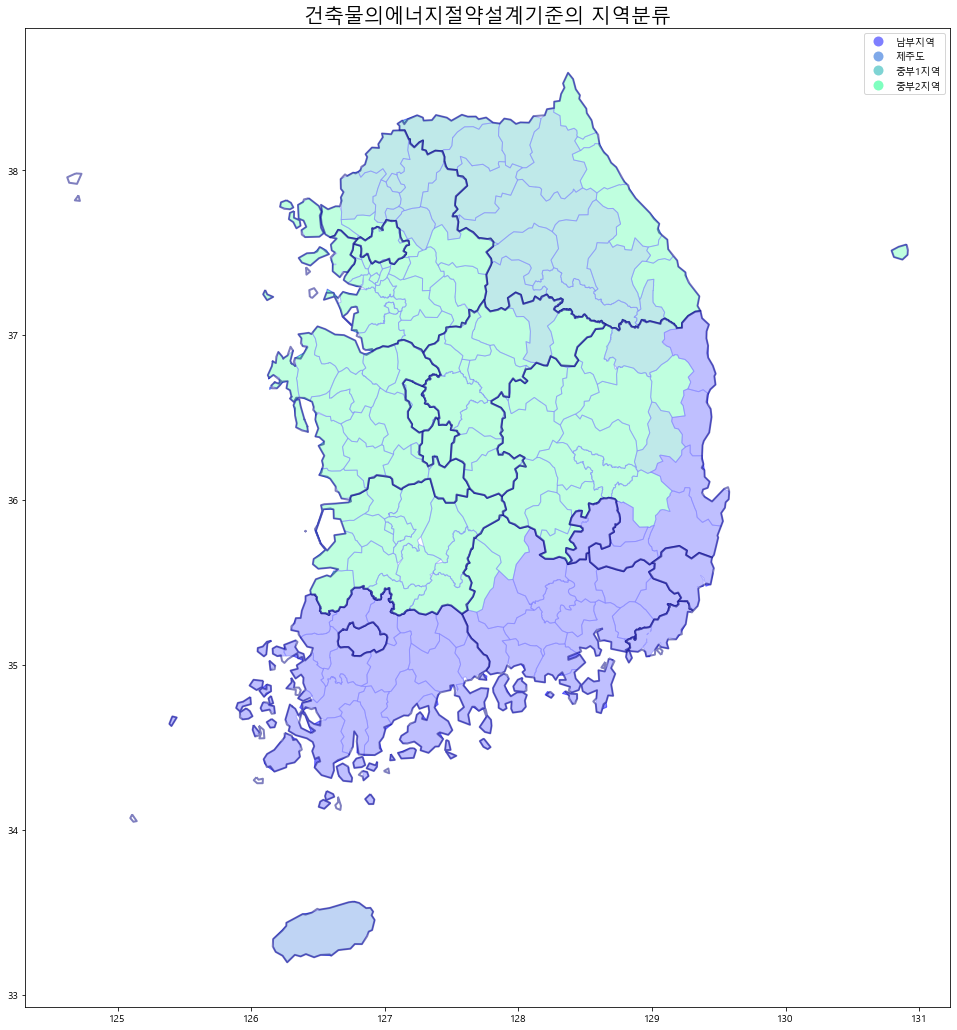

In [14]:
ax = korean_districts.plot(column = 'energy_district_class', legend = True, figsize=(18, 18), cmap='winter', alpha=0.5, edgecolor='blue')
# 시도별 라인추가
korean_areas.plot(ax = ax, color='white', edgecolor='navy', alpha=0.5, linewidth=2)
plt.rc('axes', unicode_minus=False)
plt.title('건축물의에너지절약설계기준의 지역분류', fontsize=20)
plt.show()

In [15]:
pd.options.display.max_rows = 999

In [16]:
korean_districts

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,SIG_KOR_NM_copy,energy_district_class
0,42110,Chuncheon-si,춘천시,"POLYGON ((127.60473 38.07265, 127.60776 38.071...",춘천시,중부1지역
1,42130,Wonju-si,원주시,"POLYGON ((128.10856 37.29880, 128.10879 37.297...",원주시,중부1지역
2,42150,Gangneung-si,강릉시,"POLYGON ((129.04785 37.64961, 129.07405 37.604...",강릉시,중부2지역
3,42170,Donghae-si,동해시,"POLYGON ((129.15959 37.47574, 129.15821 37.476...",동해시,중부2지역
4,42190,Taebaek-si,태백시,"POLYGON ((129.01210 37.31012, 129.01256 37.308...",태백시,중부1지역
5,42210,Sokcho-si,속초시,"POLYGON ((128.60871 38.16128, 128.60125 38.159...",속초시,중부2지역
6,42230,Samcheok-si,삼척시,"POLYGON ((129.36340 37.14600, 129.32483 37.142...",삼척시,중부2지역
7,42720,Hongcheon-gun,홍천군,"POLYGON ((128.02904 37.94429, 128.03011 37.944...",홍천군,중부1지역
8,42730,Hoengseong-gun,횡성군,"POLYGON ((127.84808 37.55230, 127.84810 37.552...",횡성군,중부1지역
9,42750,Yeongwol-gun,영월군,"POLYGON ((128.29418 37.40077, 128.29402 37.400...",영월군,중부1지역


In [17]:
korean_districts.to_file('C:/Users/ilove/Desktop/DATA/district in Korea/korean_districts.geojson', driver='GeoJSON')